In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv
/kaggle/input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv
/kaggle/input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv
/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kiva = pd.read_csv ('../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')

In [4]:
loan_countries = kiva.groupby('country')['loan_amount'].sum().sort_values (ascending = False).reset_index(). head (10)
loan_countries

,country,loan_amount
0,Philippines,55342225.0
1,Kenya,34534300.0
2,United States,31496375.0
3,Peru,30867400.0
4,Paraguay,29629075.0
5,El Salvador,26603650.0
6,Cambodia,19872700.0
7,Bolivia,19843250.0
8,Rwanda,16646300.0
9,Uganda,15389350.0


[Text(0.5, 1.0, 'Top 10 Countries with Highest Loans'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Total Loan Amount')]

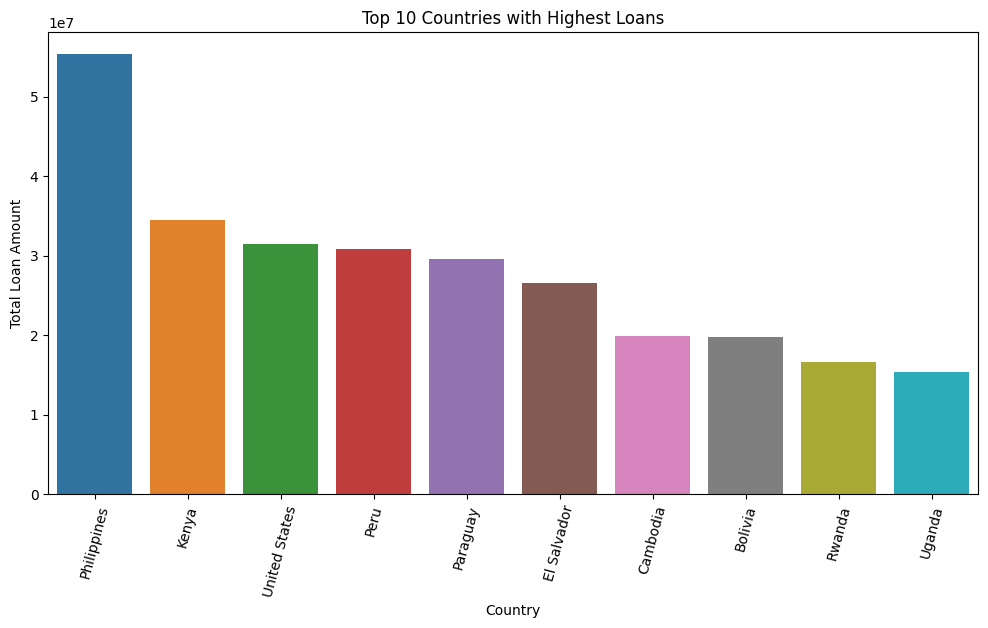

In [5]:
plt.figure (figsize = (12,6))
plt.xticks (rotation = 75)
sns.barplot (x= 'country', y= 'loan_amount', data = loan_countries). set(title= "Top 10 Countries with Highest Loans", xlabel= "Country", ylabel= 'Total Loan Amount')

In [6]:
philippines = kiva[kiva['country']== 'Philippines']. reset_index (drop = True)

[Text(0.5, 1.0, 'Total Loan Amount by Sector'),
 Text(0.5, 0, 'Sector'),
 Text(0, 0.5, 'Total Loan Amount')]

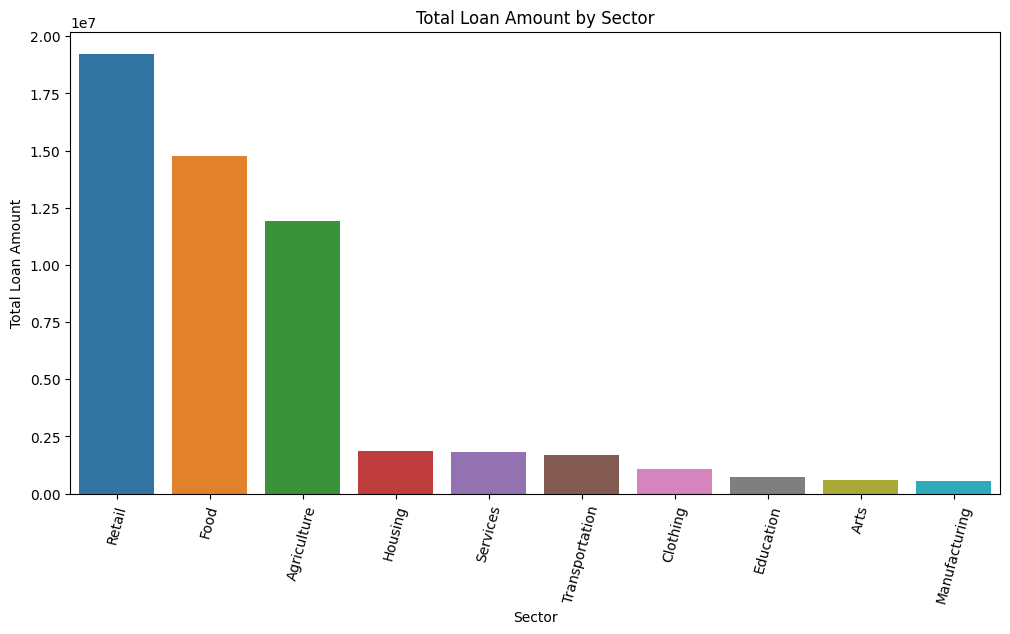

In [7]:
loans_sector = philippines.groupby ('sector')['loan_amount'].sum().sort_values(ascending = False). reset_index().head(10)
plt.figure (figsize = (12,6))
plt.xticks (rotation = 75)
sns.barplot (x= 'sector', y= 'loan_amount', data = loans_sector). set(title= 'Total Loan Amount by Sector', xlabel = "Sector", ylabel= 'Total Loan Amount')

In [8]:
#some loan uses are in repeat with one a "." or " " differentiating them. There, I used the following codes to join them.

philippines ['use'] = philippines ['use'].astype (str) #change to string type
def remove_end_spaces (string): 
    return "".join(string.strip())
philippines ['use'] = philippines ['use'].apply (remove_end_spaces) #to add all the strings together.
transtab = str. maketrans (dict. fromkeys (".",""))
transtab2 = str. maketrans (dict. fromkeys ("-"," "))
philippines ['use'] = '|'.join (philippines ['use']. tolist()).translate (transtab). split ('|') #to split the strings
philippines ['use'] = '|'.join (philippines ['use']. tolist()).translate (transtab2). split ('|')

In [9]:
top10_loans_retail = philippines[philippines['sector'] == 'Retail'].groupby('use')['loan_amount'].sum().sort_values (ascending = False).reset_index(). head (10)
top10_loans_retail

,use,loan_amount
0,to purchase more groceries to sell,577925.0
1,to buy additional stocks of groceries to sell,350675.0
2,to buy more groceries to sell,333100.0
3,"to buy items to sell like canned goods, person...",203850.0
4,to purchase more groceries to sell in her gene...,184125.0
5,to buy additional items to sell in her general...,162275.0
6,to buy more stocks of groceries to sell,160500.0
7,"to buy items to sell like shampoo, groceries, etc",149975.0
8,to buy more groceries to sell in her general s...,138300.0
9,to buy additional stock of groceries to sell,127825.0


[Text(0.5, 0, 'Use'), Text(0, 0.5, 'Total Loan Amount')]

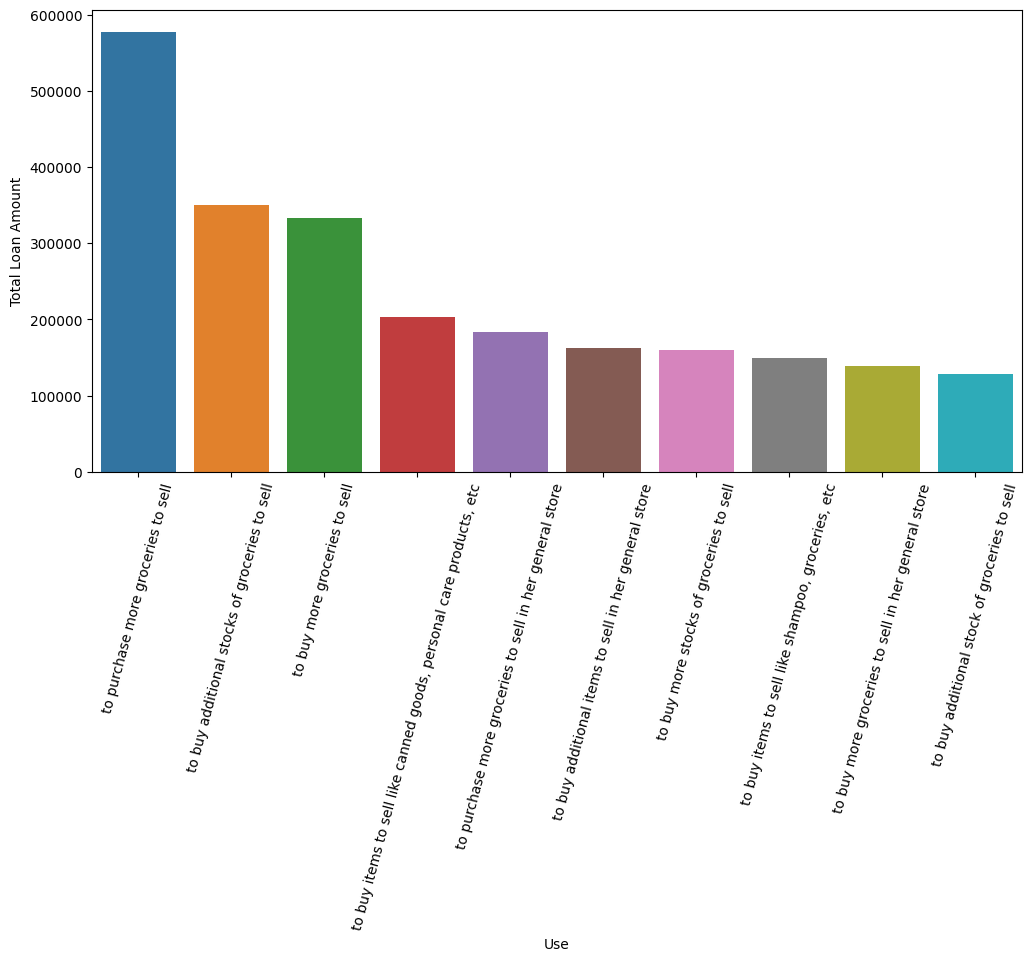

In [10]:
plt.figure (figsize = (12,6))
plt.xticks (rotation = 75)
sns.barplot (x= 'use', y= 'loan_amount', data = top10_loans_retail). set(xlabel = "Use", ylabel= 'Total Loan Amount')

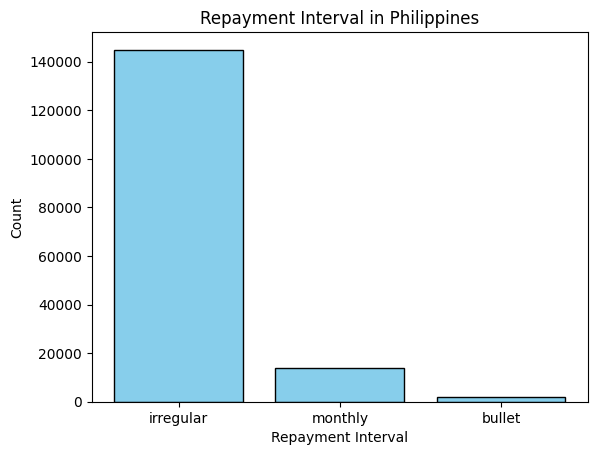

In [11]:
counts = philippines['repayment_interval'].value_counts()
plt.bar(counts.index, counts, color='skyblue', edgecolor='black')
plt.title("Repayment Interval in Philippines")
plt.xlabel("Repayment Interval")
plt.ylabel("Count")
plt.show()